In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### MATH 189 Final Project

#### Import the Data

In [3]:
pl_2018 = pd.read_csv('data/PL_2018_2019.csv')
pl_2019 = pd.read_csv('data/PL_2019_2020.csv')
pl_2023 = pd.read_csv('data/PL_2023_2024.csv')

#### Column Keys

#### Exploratory Data Analysis

In [4]:
pl_2018.head()

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,BbAv<2.5,BbAH,BbAHh,BbMxAHH,BbAvAHH,BbMxAHA,BbAvAHA,PSCH,PSCD,PSCA
0,E0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,...,1.79,17,-0.75,1.75,1.70,2.29,2.21,1.55,4.07,7.69
1,E0,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,...,1.83,20,-0.75,2.20,2.13,1.80,1.75,1.88,3.61,4.70
2,E0,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,...,1.87,22,-0.25,2.18,2.11,1.81,1.77,2.62,3.38,2.90
3,E0,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,...,1.84,23,1.00,1.84,1.80,2.13,2.06,7.24,3.95,1.58
4,E0,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,...,1.81,20,0.25,2.20,2.12,1.80,1.76,4.74,3.53,1.89


In [5]:
pl_2019.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,09/08/2019,20:00,Liverpool,Norwich,4,1,H,4,0,...,3.43,-2.25,1.91,1.99,1.94,1.98,1.99,2.07,1.90,1.99
1,E0,10/08/2019,12:30,West Ham,Man City,0,5,A,0,1,...,2.91,1.75,1.95,1.95,1.96,1.97,2.07,1.98,1.97,1.92
2,E0,10/08/2019,15:00,Bournemouth,Sheffield United,1,1,D,0,0,...,1.92,-0.50,1.95,1.95,1.98,1.95,2.00,1.96,1.96,1.92
3,E0,10/08/2019,15:00,Burnley,Southampton,3,0,H,0,0,...,1.71,0.00,1.87,2.03,1.89,2.03,1.90,2.07,1.86,2.02
4,E0,10/08/2019,15:00,Crystal Palace,Everton,0,0,D,0,0,...,1.71,0.25,1.82,2.08,1.97,1.96,2.03,2.08,1.96,1.93


In [6]:
pl_2023.head()

,Div,Date,Time,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,...,AvgC<2.5,AHCh,B365CAHH,B365CAHA,PCAHH,PCAHA,MaxCAHH,MaxCAHA,AvgCAHH,AvgCAHA
0,E0,11/08/2023,20:00,Burnley,Man City,0,3,A,0,2,...,2.28,1.50,1.95,1.98,1.95,1.97,NaN,NaN,1.92,1.95
1,E0,12/08/2023,12:30,Arsenal,Nott'm Forest,2,1,H,2,0,...,2.63,-2.00,1.95,1.98,1.93,1.97,2.01,2.09,1.95,1.92
2,E0,12/08/2023,15:00,Bournemouth,West Ham,1,1,D,0,0,...,2.12,0.00,2.02,1.91,2.01,1.92,2.06,1.96,1.96,1.91
3,E0,12/08/2023,15:00,Brighton,Luton,4,1,H,1,0,...,2.48,-1.75,2.01,1.92,2.00,1.91,2.14,1.93,2.00,1.86
4,E0,12/08/2023,15:00,Everton,Fulham,0,1,A,0,0,...,1.71,-0.25,2.06,1.87,2.04,1.88,2.08,1.99,1.98,1.88


General Dataset Cleanup

In [7]:
# the columns related to betting data - look at notes.txt for more info
columns_to_keep = [
    'Div', 'Date', 'Time', 'HomeTeam', 'AwayTeam',
    'FTHG', 'HG', 'FTAG', 'AG', 'FTR', 'Res',
    'HTHG', 'HTAG', 'HTR',
    'Attendance', 'Referee',
    'HS', 'AS', 'HST', 'AST', 'HHW', 'AHW',
    'HC', 'AC', 'HF', 'AF', 'HFKC', 'AFKC',
    'HO', 'AO', 'HY', 'AY', 'HR', 'AR',
    'HBP', 'ABP'
]

pl_2018 = pl_2018[[col for col in columns_to_keep if col in pl_2018.columns]]
pl_2019 = pl_2019[[col for col in columns_to_keep if col in pl_2019.columns]]
pl_2023 = pl_2023[[col for col in columns_to_keep if col in pl_2023.columns]]

rename_columns = {
    'Div': 'LeagueDivision',
    'Date': 'MatchDate',
    'Time': 'KickoffTime',
    'HomeTeam': 'HomeTeam',
    'AwayTeam': 'AwayTeam',
    'FTHG': 'FullTimeHomeGoals',
    'FTAG': 'FullTimeAwayGoals',
    'FTR': 'FullTimeResult',
    'HTHG': 'HalfTimeHomeGoals',
    'HTAG': 'HalfTimeAwayGoals',
    'HTR': 'HalfTimeResult',
    'Attendance': 'Attendance',
    'Referee': 'Referee',
    'HS': 'HomeShots',
    'AS': 'AwayShots',
    'HST': 'HomeShotsOnTarget',
    'AST': 'AwayShotsOnTarget',
    'HHW': 'HomeHitWoodwork',
    'AHW': 'AwayHitWoodwork',
    'HC': 'HomeCorners',
    'AC': 'AwayCorners',
    'HF': 'HomeFouls',
    'AF': 'AwayFouls',
    'HFKC': 'HomeFreeKicksConceded',
    'AFKC': 'AwayFreeKicksConceded',
    'HO': 'HomeOffsides',
    'AO': 'AwayOffsides',
    'HY': 'HomeYellowCards',
    'AY': 'AwayYellowCards',
    'HR': 'HomeRedCards',
    'AR': 'AwayRedCards',
    'HBP': 'HomeBookingPoints',
    'ABP': 'AwayBookingPoints'
}

pl_2018.rename(columns=rename_columns, inplace=True)
pl_2019.rename(columns=rename_columns, inplace=True)
pl_2023.rename(columns=rename_columns, inplace=True)

Find any missing values

In [8]:
print(f'Null values in pl_2018 dataset: {pl_2018.isna().sum().sum()}')
print(f'Null values in pl_2019 dataset: {pl_2019.isna().sum().sum()}')
print(f'Null values in pl_2023 dataset: {pl_2023.isna().sum().sum()}')

Null values in pl_2018 dataset: 0
Null values in pl_2019 dataset: 0
Null values in pl_2023 dataset: 0


Convert the corresponding variables to categorical

In [9]:
categorical_cols = [
    'LeagueDivision',
    'HomeTeam',
    'AwayTeam',
    'FullTimeResult',
    'HalfTimeResult',
    'Referee'
]

for col in categorical_cols:
    if col in pl_2018.columns:
        pl_2018[col] = pl_2018[col].astype('category')
    if col in pl_2019.columns:
        pl_2019[col] = pl_2019[col].astype('category')
    if col in pl_2023.columns:
        pl_2023[col] = pl_2023[col].astype('category')

Dataset Description

In [10]:
pl_2018.describe()

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,5.705263,4.552632,10.152632,10.305263,1.526316,1.684211,0.047368,0.076316
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,2.971718,2.730627,3.293532,3.503707,1.222844,1.209140,0.212706,0.275599
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,4.000000,2.750000,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,5.000000,4.000000,10.000000,10.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,8.000000,6.000000,12.000000,13.000000,2.000000,2.000000,0.000000,0.000000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,16.000000,14.000000,23.000000,21.000000,6.000000,5.000000,1.000000,2.000000


In [11]:
pl_2019.describe()

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.515789,1.205263,0.700000,0.550000,13.323684,11.400000,4.555263,3.994737,5.773684,4.931579,10.484211,10.981579,1.586842,1.765789,0.057895,0.060526
std,1.248646,1.200252,0.886427,0.758505,5.417938,5.255278,2.520543,2.489020,3.217095,2.835052,3.582759,3.713653,1.241471,1.217891,0.244875,0.238774
min,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,3.000000,3.000000,8.000000,8.000000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,13.000000,11.000000,4.000000,4.000000,5.000000,5.000000,10.000000,11.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,16.000000,14.000000,6.000000,5.000000,8.000000,7.000000,13.000000,13.000000,2.000000,3.000000,0.000000,0.000000
max,8.000000,9.000000,5.000000,5.000000,31.000000,26.000000,13.000000,15.000000,17.000000,16.000000,23.000000,24.000000,6.000000,6.000000,2.000000,1.000000


In [12]:
pl_2023.describe()

,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HomeShots,AwayShots,HomeShotsOnTarget,AwayShotsOnTarget,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.800000,1.478947,0.734211,0.626316,15.402632,12.181579,5.436842,4.431579,6.123684,4.713158,10.744737,11.347368,1.910526,2.263158,0.068421,0.081579
std,1.365616,1.277811,0.831687,0.823367,6.261959,5.467696,2.885449,2.526493,3.221460,2.906518,3.457331,3.674826,1.392553,1.389448,0.263030,0.283546
min,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,11.000000,8.000000,3.000000,3.000000,4.000000,3.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,1.000000,1.000000,0.000000,15.000000,11.000000,5.000000,4.000000,6.000000,4.000000,11.000000,11.000000,2.000000,2.000000,0.000000,0.000000
75%,3.000000,2.000000,1.000000,1.000000,19.000000,15.000000,7.000000,6.000000,8.000000,6.000000,13.000000,14.000000,3.000000,3.000000,0.000000,0.000000
max,6.000000,8.000000,4.000000,5.000000,36.000000,30.000000,15.000000,15.000000,17.000000,15.000000,20.000000,22.000000,6.000000,7.000000,2.000000,2.000000


Referee EDA

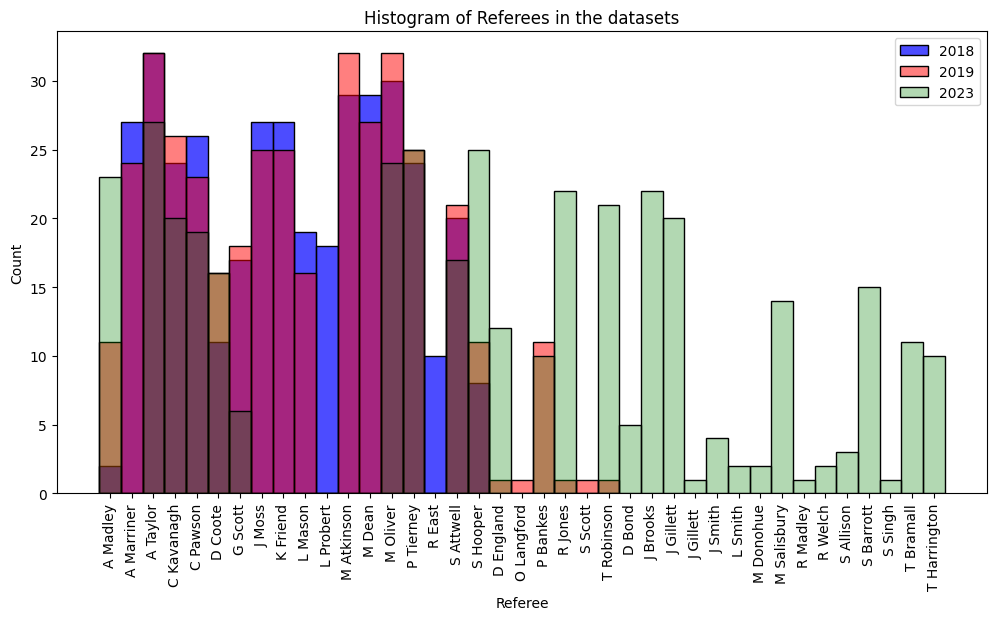

Referee with the most matches in 2018 dataset: A Taylor
Referee with the most matches in 2019 dataset: M Atkinson
Referee with the most matches in 2023 dataset: A Taylor


In [13]:
# plot the histogram of all the refrees in the datasets
plt.figure(figsize=(12, 6))
sns.histplot(pl_2018['Referee'], kde=False, color='blue', alpha=0.7)
sns.histplot(pl_2019['Referee'], kde=False, color='red', alpha=0.5)
sns.histplot(pl_2023['Referee'], kde=False, color='green', alpha=0.3)
plt.xticks(rotation=90)
plt.legend(['2018', '2019', '2023'])
plt.title('Histogram of Referees in the datasets')
plt.show()

# refree with the most matches in the datasets
most_matches_2018 = pl_2018['Referee'].value_counts().idxmax()
most_matches_2019 = pl_2019['Referee'].value_counts().idxmax()
most_matches_2023 = pl_2023['Referee'].value_counts().idxmax()

print(f'Referee with the most matches in 2018 dataset: {most_matches_2018}')
print(f'Referee with the most matches in 2019 dataset: {most_matches_2019}')
print(f'Referee with the most matches in 2023 dataset: {most_matches_2023}')


Match Results EDA

In [14]:
pl_2018[["FullTimeResult"]].value_counts()/len(pl_2018)

FullTimeResult
H                 0.476316
A                 0.336842
D                 0.186842
Name: count, dtype: float64

Text(0.5, 1.0, 'Histogram of Full Time Results in the datasets')

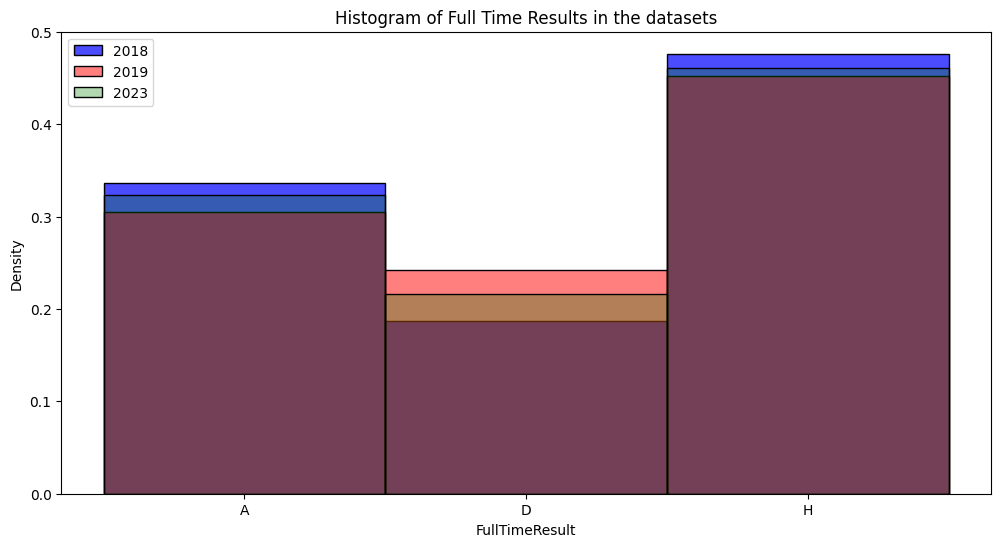

In [15]:
# plot the histogram of full time results in the datasets
plt.figure(figsize=(12, 6))
sns.histplot(pl_2018["FullTimeResult"], kde=False, color='blue', alpha=0.7, stat="density")
sns.histplot(pl_2019["FullTimeResult"], kde=False, color='red', alpha=0.5, stat="density")
sns.histplot(pl_2023["FullTimeResult"], kde=False, color='green', alpha=0.3, stat="density")
plt.legend(['2018', '2019', '2023'])
plt.title('Histogram of Full Time Results in the datasets')


Home and Away Fouls EDA

/var/folders/pn/2dg49b3d1bv5nvhgytbsqc7h0000gn/T/ipykernel_10754/3704345294.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='HomeFouls', data=combined_df, palette=['blue', 'red', 'green'])


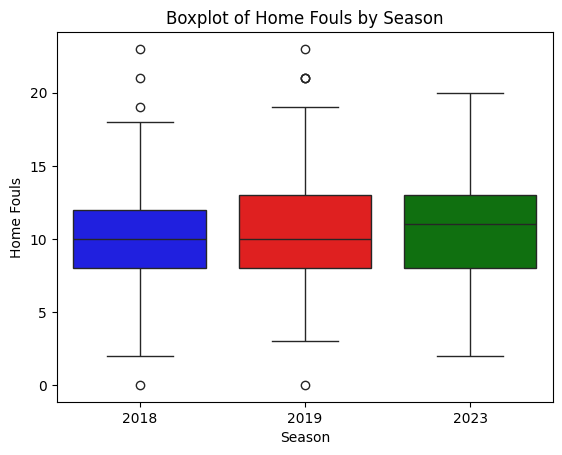

/var/folders/pn/2dg49b3d1bv5nvhgytbsqc7h0000gn/T/ipykernel_10754/3704345294.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Season', y='AwayFouls', data=combined_df, palette=['blue', 'red', 'green'])


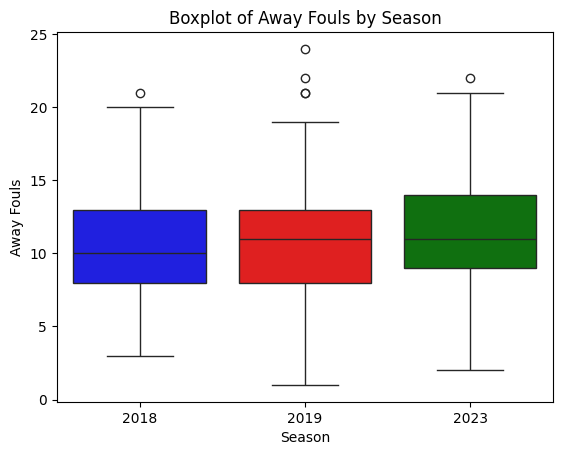

In [16]:
pl_2018['Season'] = '2018'
pl_2019['Season'] = '2019'
pl_2023['Season'] = '2023'

combined_df = pd.concat([pl_2018, pl_2019, pl_2023])

sns.boxplot(x='Season', y='HomeFouls', data=combined_df, palette=['blue', 'red', 'green'])

plt.title('Boxplot of Home Fouls by Season')
plt.xlabel('Season')
plt.ylabel('Home Fouls')
plt.show()

sns.boxplot(x='Season', y='AwayFouls', data=combined_df, palette=['blue', 'red', 'green'])
plt.title('Boxplot of Away Fouls by Season')
plt.xlabel('Season')
plt.ylabel('Away Fouls')
plt.show()


Bookings EDA

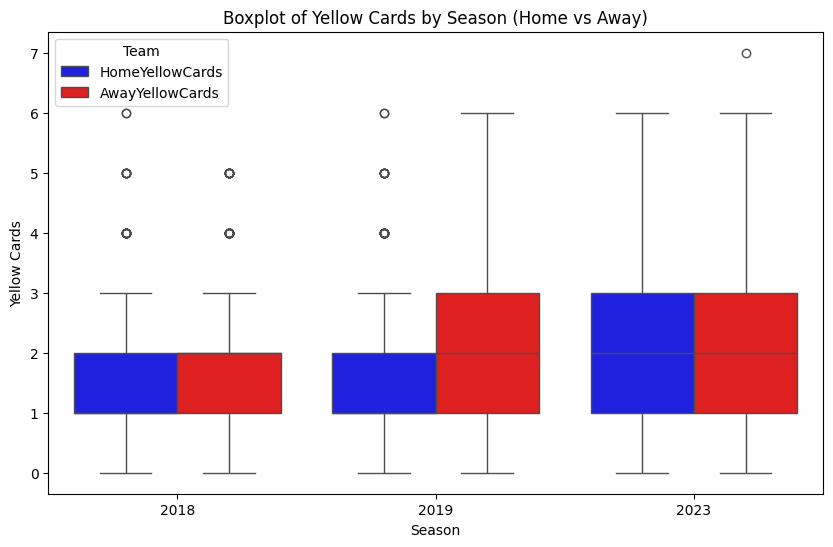

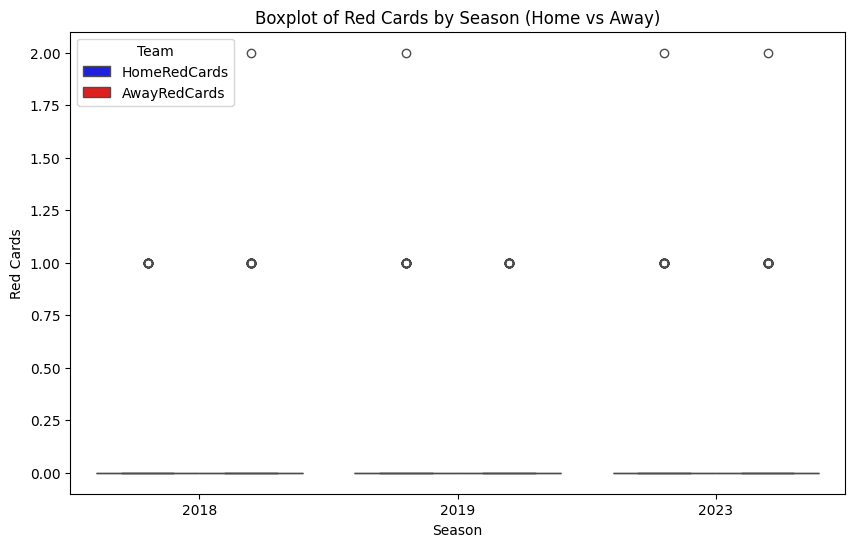

In [17]:
yellow_cards_df = combined_df.melt(
    id_vars=['Season'],
    value_vars=['HomeYellowCards', 'AwayYellowCards'],
    var_name='TeamType',
    value_name='YellowCards'
)

plt.figure(figsize=(10, 6))

sns.boxplot(
    x='Season',
    y='YellowCards',
    hue='TeamType',
    data=yellow_cards_df,
    palette={'HomeYellowCards': 'blue', 'AwayYellowCards': 'red'}
)

plt.title('Boxplot of Yellow Cards by Season (Home vs Away)')
plt.xlabel('Season')
plt.ylabel('Yellow Cards')
plt.legend(title='Team')
plt.show()

red_cards_df = combined_df.melt(
    id_vars=['Season'],
    value_vars=['HomeRedCards', 'AwayRedCards'],
    var_name='TeamType',
    value_name='RedCards'
)

plt.figure(figsize=(10, 6))

sns.boxplot(
    x='Season',
    y='RedCards',
    hue='TeamType',
    data=red_cards_df,
    palette={'HomeRedCards': 'blue', 'AwayRedCards': 'red'}
)

plt.title('Boxplot of Red Cards by Season (Home vs Away)')
plt.xlabel('Season')
plt.ylabel('Red Cards')
plt.legend(title='Team')
plt.show()

In [18]:
combined_df = combined_df.drop(columns={"LeagueDivision"})
combined_df

,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,Referee,...,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Season,KickoffTime
0,10/08/2018,Man United,Leicester,2,1,H,1,0,H,A Marriner,...,2,5,11,8,2,1,0,0,2018,NaN
1,11/08/2018,Bournemouth,Cardiff,2,0,H,1,0,H,K Friend,...,7,4,11,9,1,1,0,0,2018,NaN
2,11/08/2018,Fulham,Crystal Palace,0,2,A,0,1,A,M Dean,...,5,5,9,11,1,2,0,0,2018,NaN
3,11/08/2018,Huddersfield,Chelsea,0,3,A,0,2,A,C Kavanagh,...,2,5,9,8,2,1,0,0,2018,NaN
4,11/08/2018,Newcastle,Tottenham,1,2,A,1,2,A,M Atkinson,...,3,5,11,12,2,2,0,0,2018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,19/05/2024,Crystal Palace,Aston Villa,5,0,H,2,0,H,D Bond,...,2,4,10,8,1,4,0,0,2023,16:00
376,19/05/2024,Liverpool,Wolves,2,0,H,2,0,H,C Kavanagh,...,10,2,14,11,1,1,0,1,2023,16:00
377,19/05/2024,Luton,Fulham,2,4,A,1,2,A,M Donohue,...,4,4,15,20,5,4,0,0,2023,16:00
378,19/05/2024,Man City,West Ham,3,1,H,2,1,H,J Brooks,...,11,2,3,12,0,1,0,0,2023,16:00


In [19]:
combined_df.columns

Index(['MatchDate', 'HomeTeam', 'AwayTeam', 'FullTimeHomeGoals',
       'FullTimeAwayGoals', 'FullTimeResult', 'HalfTimeHomeGoals',
       'HalfTimeAwayGoals', 'HalfTimeResult', 'Referee', 'HomeShots',
       'AwayShots', 'HomeShotsOnTarget', 'AwayShotsOnTarget', 'HomeCorners',
       'AwayCorners', 'HomeFouls', 'AwayFouls', 'HomeYellowCards',
       'AwayYellowCards', 'HomeRedCards', 'AwayRedCards', 'Season',
       'KickoffTime'],
      dtype='object')

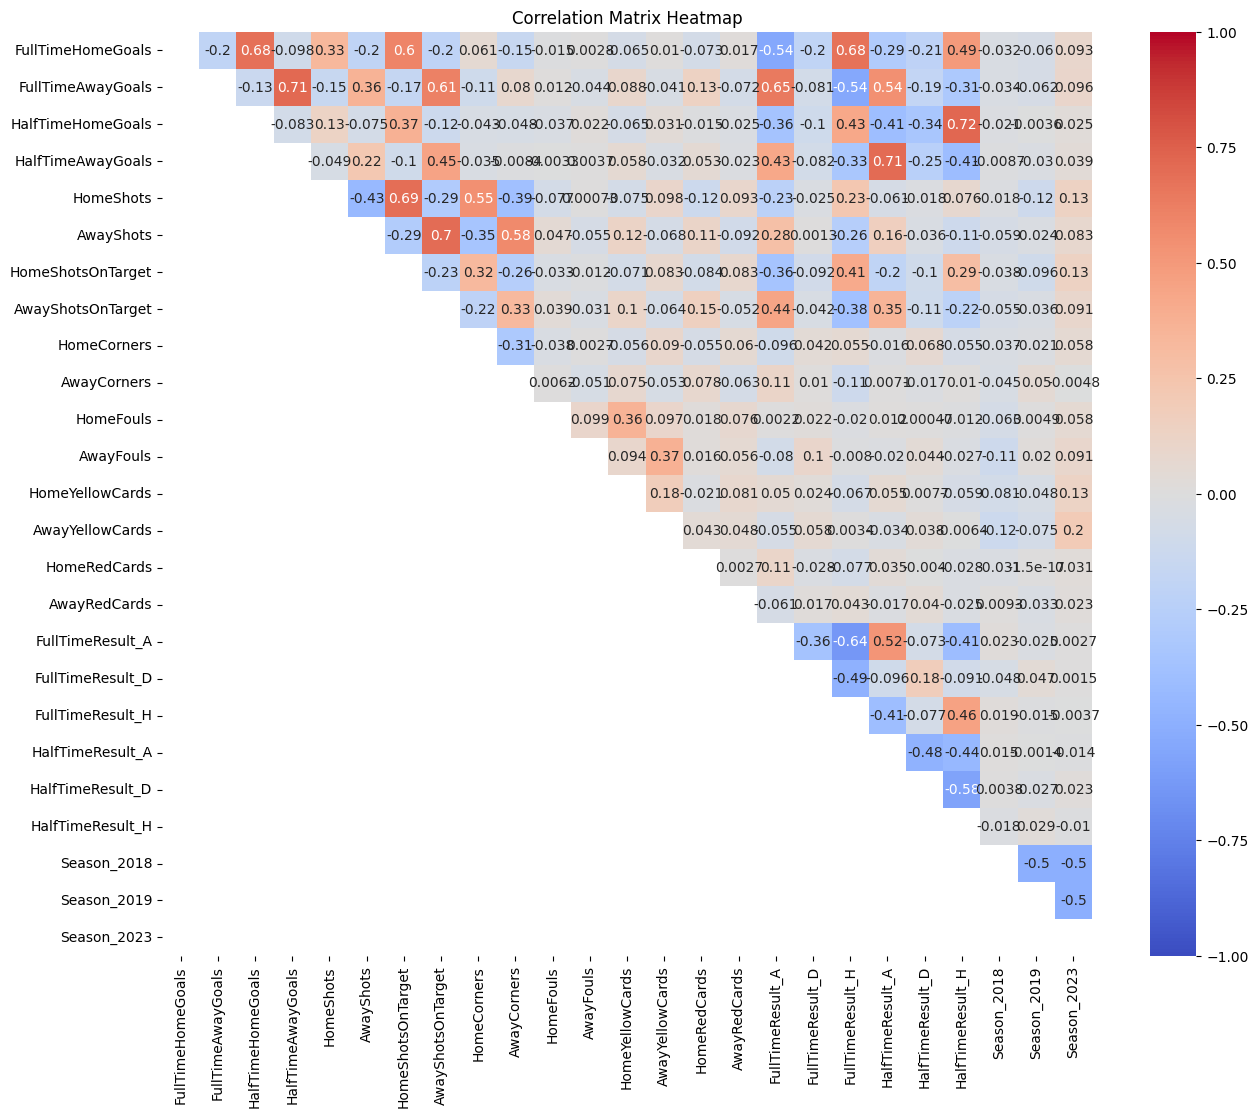

In [20]:
#make mathcdate = is_weekend ; not_is_weekend
#make referee = ???
df = pd.get_dummies(combined_df, columns=['FullTimeResult', 'HalfTimeResult', 'Season'], drop_first=False)
df = df.drop(columns={"MatchDate", "Referee", 'KickoffTime','HomeTeam', 'AwayTeam'})
corr = df.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(15, 12))

# Create a heatmap with annotations and a diverging color palette
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title (optional)
plt.title('Correlation Matrix Heatmap')

# Display the plot
plt.show()

In [21]:
#time vs fouls - aniket
#is_weekend / not_is_weekend vs fouls - aniket
#home_team_result vs. home_team_corners - varun
#home_team_result vs away_team_fouls - varun
#home_team_win - varun

#PCA to find the key features - find the most relevant feature - varun
#the features that support the home team - are those differences/observed values significant
#do before-after VAR stuff

#pick an appropriate feature and make a test statistic - either just linear regression/PCR/log regression

/var/folders/pn/2dg49b3d1bv5nvhgytbsqc7h0000gn/T/ipykernel_10754/1915657453.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  time_win['KickoffHour'] = pd.to_datetime(time_win['KickoffTime']).dt.hour


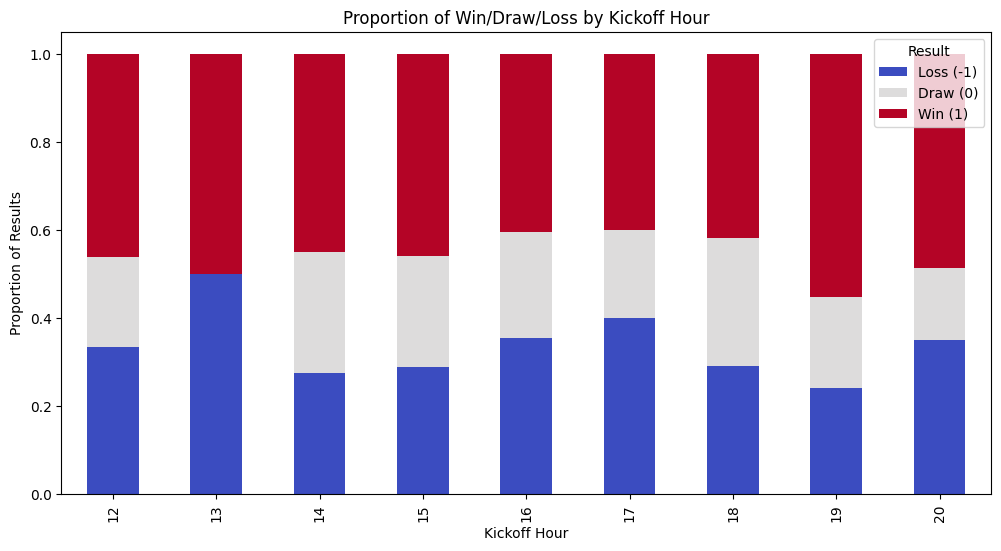

In [22]:
time_win = combined_df[['KickoffTime', 'FullTimeResult', 'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards']]
time_win = time_win.dropna()
# Group by hour and calculate outcome percentages
time_win['KickoffHour'] = pd.to_datetime(time_win['KickoffTime']).dt.hour
hourly_results = time_win.groupby('KickoffHour')['FullTimeResult'].value_counts(normalize=True).unstack().fillna(0)

# Plot
hourly_results.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.xlabel('Kickoff Hour')
plt.ylabel('Proportion of Results')
plt.title('Proportion of Win/Draw/Loss by Kickoff Hour')
plt.legend(title='Result', labels=['Loss (-1)', 'Draw (0)', 'Win (1)'])
plt.show()

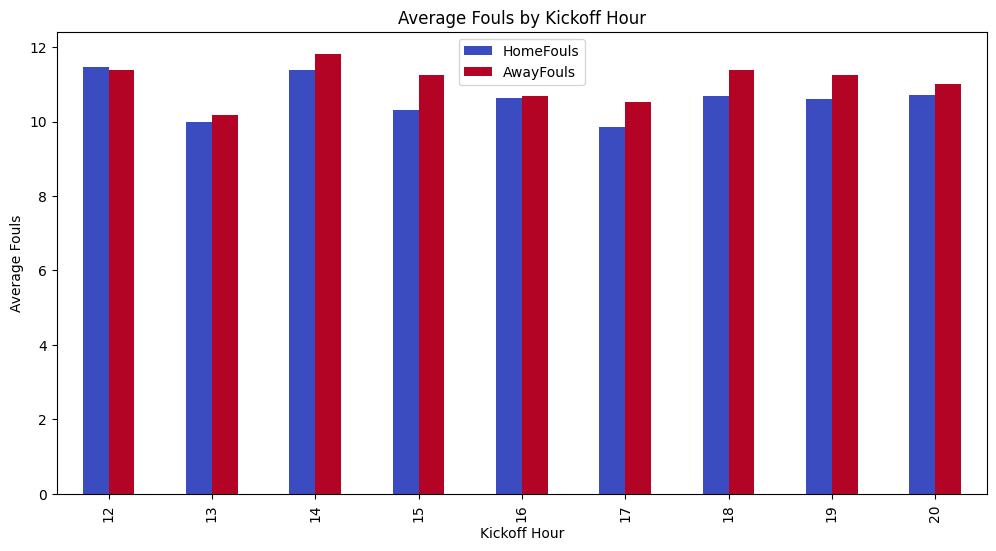

In [23]:
# plot the fouls by hour
hourly_fouls = time_win.groupby('KickoffHour')[['HomeFouls', 'AwayFouls']].mean()
hourly_fouls.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.xlabel('Kickoff Hour')
plt.ylabel('Average Fouls')
plt.title('Average Fouls by Kickoff Hour')
plt.show()

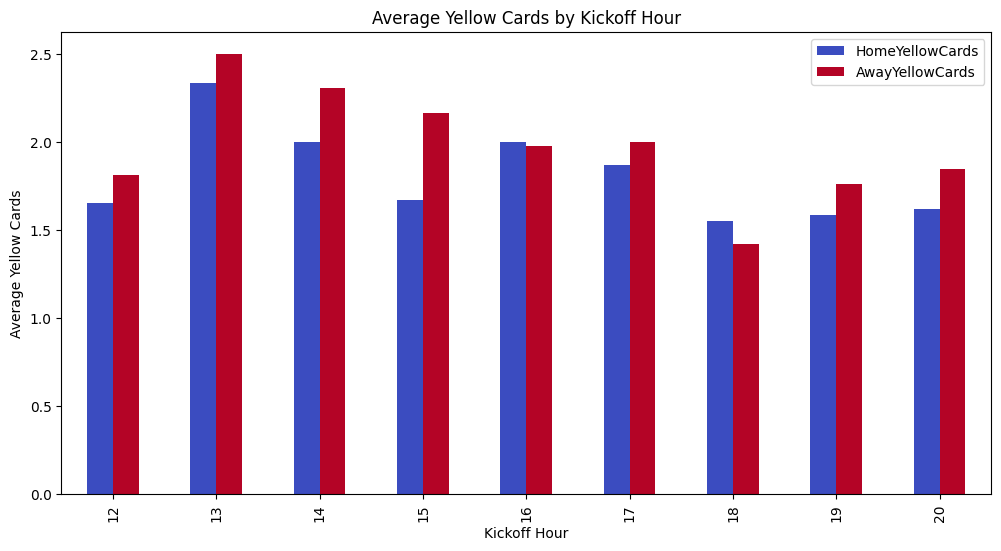

In [24]:
# plot the yellow cards by hour
hourly_yellow_cards = time_win.groupby('KickoffHour')[['HomeYellowCards', 'AwayYellowCards']].mean()
hourly_yellow_cards.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.xlabel('Kickoff Hour')
plt.ylabel('Average Yellow Cards')
plt.title('Average Yellow Cards by Kickoff Hour')
plt.show()

In [26]:
weekend_win = combined_df[['MatchDate', 'FullTimeResult', 'HomeFouls', 'AwayFouls', 'HomeYellowCards', 'AwayYellowCards']]
weekend_win = weekend_win.dropna()
# Group by is weekend and calculate outcome percentages
weekend_win['IsWeekend'] = pd.to_datetime(weekend_win['MatchDate']).dt.dayofweek.isin([5, 6])

weekend_results = weekend_win.groupby('IsWeekend')['FullTimeResult'].value_counts(normalize=True).unstack().fillna(0)

# Plot
weekend_results.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='coolwarm')
plt.xlabel('Is Weekend')
plt.ylabel('Proportion of Results')
plt.title('Proportion of Win/Draw/Loss by Weekend')
plt.legend(title='Result', labels=['Loss (-1)', 'Draw (0)', 'Win (1)'])
plt.show()


ValueError: time data "18/08/2018" doesn't match format "%m/%d/%Y", at position 3. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [27]:
# plot the fouls by weekend
weekend_fouls = weekend_win.groupby('IsWeekend').mean().drop(columns=['HomeYellowCards', 'AwayYellowCards'])
weekend_fouls.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.xlabel('Is Weekend')
plt.ylabel('Average Fouls')
plt.title('Average Fouls by Weekend')
plt.show()

KeyError: 'IsWeekend'

In [28]:
# plot the fouls by weekend
weekend_fouls = weekend_win.groupby('IsWeekend').mean().drop(columns=['HomeFouls', 'AwayFouls'])
weekend_fouls.plot(kind='bar', figsize=(12, 6), colormap='coolwarm')
plt.xlabel('Is Weekend')
plt.ylabel('Average Fouls')
plt.title('Average Yellow Cards by Weekend')
plt.show()

KeyError: 'IsWeekend'

In [38]:
#home_team_wins

combined_df.groupby("FullTimeResult", observed=True).count()

,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,Referee,HomeShots,...,HomeCorners,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Season,KickoffTime
FullTimeResult,,,,,,,,,,,,,,,,,,,,,
A,367,367,367,367,367,367,367,367,367,367,...,367,367,367,367,367,367,367,367,367,239
D,245,245,245,245,245,245,245,245,245,245,...,245,245,245,245,245,245,245,245,245,174
H,528,528,528,528,528,528,528,528,528,528,...,528,528,528,528,528,528,528,528,528,347


In [44]:
combined_df["HomeCorners"].unique()

array([ 2,  7,  5,  3,  8,  1,  6, 10,  4,  9, 12, 11, 14, 13,  0, 16, 17,
       15])

FullTimeResult         A         D         H
HomeCorners                                 
0               0.466667  0.133333  0.400000
1               0.423729  0.220339  0.355932
2               0.450000  0.212500  0.337500
3               0.305785  0.256198  0.438017
4               0.318471  0.203822  0.477707
5               0.402985  0.156716  0.440299
6               0.244444  0.200000  0.555556
7               0.243243  0.252252  0.504505
8               0.333333  0.190476  0.476190
9               0.328125  0.171875  0.500000
10              0.382353  0.161765  0.455882
11              0.193548  0.290323  0.516129
12              0.156250  0.375000  0.468750
13              0.181818  0.363636  0.454545
14              0.142857  0.571429  0.285714
15              0.000000  0.333333  0.666667
16              0.250000  0.250000  0.500000
17              0.333333  0.333333  0.333333


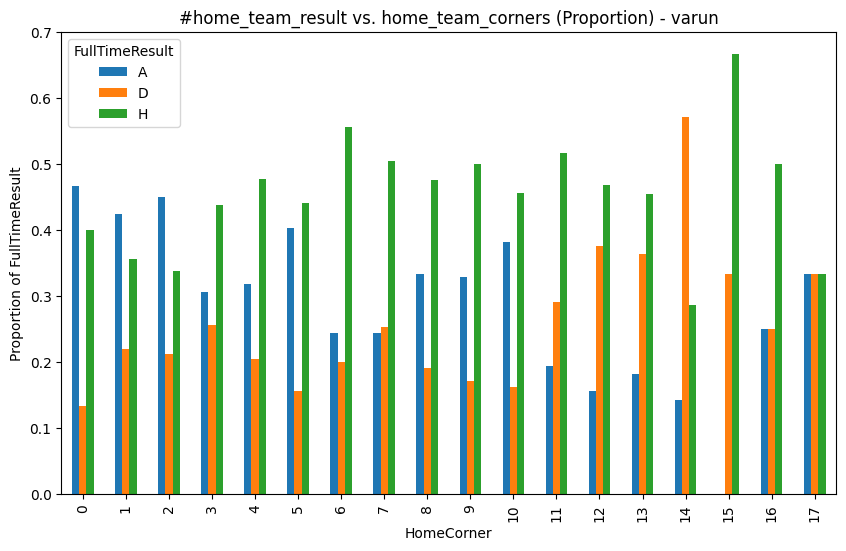

In [52]:
# Group by HomeCorner and count each FullTimeResult value
pivot = combined_df.groupby("HomeCorners")["FullTimeResult"].value_counts().unstack(fill_value=0)

# Convert counts to proportions by dividing each row by its sum
prop = pivot.div(pivot.sum(axis=1), axis=0)

# Display the resulting proportions
print(prop)

# Optional: visualize the proportions with a stacked bar chart
prop.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.title("#home_team_result vs. home_team_corners (Proportion) - varun")
plt.xlabel("HomeCorner")
plt.ylabel("Proportion of FullTimeResult")
plt.legend(title="FullTimeResult")
plt.show()


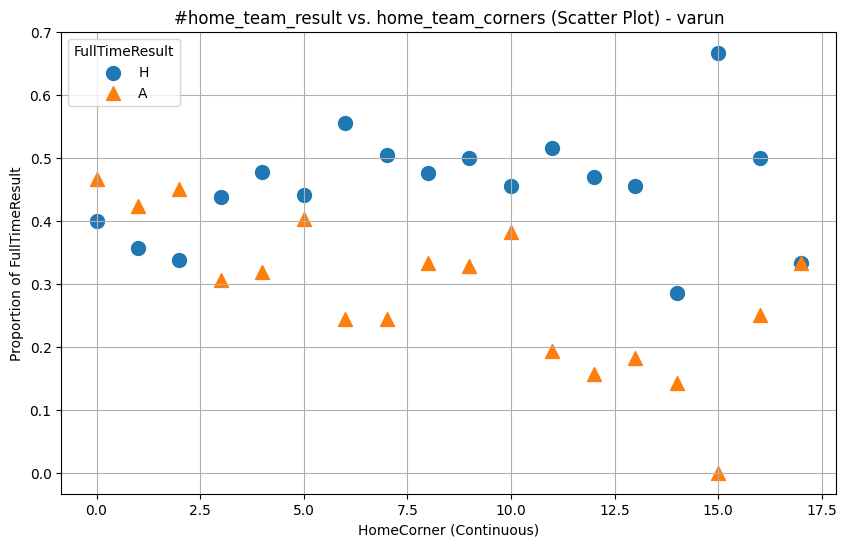

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a pivot table: counts for each FullTimeResult grouped by HomeCorner
pivot = combined_df.groupby("HomeCorners")["FullTimeResult"].value_counts().unstack(fill_value=0)

# Convert counts to proportions (each row sums to 1)
prop = pivot.div(pivot.sum(axis=1), axis=0)

# If needed, ensure the HomeCorner index is numeric
prop.index = pd.to_numeric(prop.index, errors='coerce')

# Create a scatter plot for each result category
plt.figure(figsize=(10, 6))
plt.scatter(prop.index, prop['H'], label='H', s=100, marker='o')
#plt.scatter(prop.index, prop['D'], label='D', s=100, marker='s')
plt.scatter(prop.index, prop['A'], label='A', s=100, marker='^')

plt.title('#home_team_result vs. home_team_corners (Scatter Plot) - varun')
plt.xlabel('HomeCorner (Continuous)')
plt.ylabel('Proportion of FullTimeResult')
plt.legend(title="FullTimeResult")
plt.grid(True)
plt.show()


FullTimeResult   A   D   H
HomeCorners               
0                7   2   6
1               25  13  21
2               36  17  27
3               37  31  53
4               50  32  75
5               54  21  59
6               33  27  75
7               27  28  56
8               35  20  50
9               21  11  32
10              26  11  31
11               6   9  16
12               5  12  15
13               2   4   5
14               1   4   2
15               0   1   2
16               1   1   2
17               1   1   1


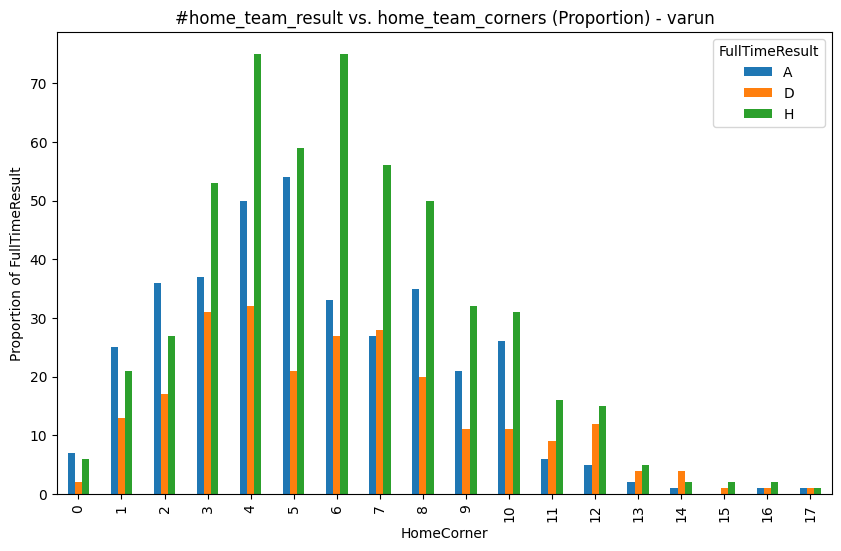

In [54]:
# Group by HomeCorner and count each FullTimeResult value
pivot = combined_df.groupby("HomeCorners")["FullTimeResult"].value_counts().unstack(fill_value=0)

# Display the resulting proportions
print(pivot)

# Optional: visualize the proportions with a stacked bar chart
pivot.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.title("#home_team_result vs. home_team_corners (Proportion) - varun")
plt.xlabel("HomeCorner")
plt.ylabel("Proportion of FullTimeResult")
plt.legend(title="FullTimeResult")
plt.show()


In [61]:
combined_df["AwayFouls"].nunique()

23

FullTimeResult         A         D         H
AwayFouls                                   
1               1.000000  0.000000  0.000000
2               1.000000  0.000000  0.000000
3               0.692308  0.000000  0.307692
4               0.363636  0.227273  0.409091
5               0.312500  0.156250  0.531250
6               0.409836  0.147541  0.442623
7               0.392405  0.164557  0.443038
8               0.329545  0.193182  0.477273
9               0.305085  0.186441  0.508475
10              0.291339  0.204724  0.503937
11              0.380952  0.198413  0.420635
12              0.262295  0.196721  0.540984
13              0.358696  0.260870  0.380435
14              0.225000  0.362500  0.412500
15              0.210526  0.280702  0.508772
16              0.314286  0.285714  0.400000
17              0.270270  0.162162  0.567568
18              0.277778  0.277778  0.444444
19              0.357143  0.285714  0.357143
20              0.166667  0.500000  0.333333
21        

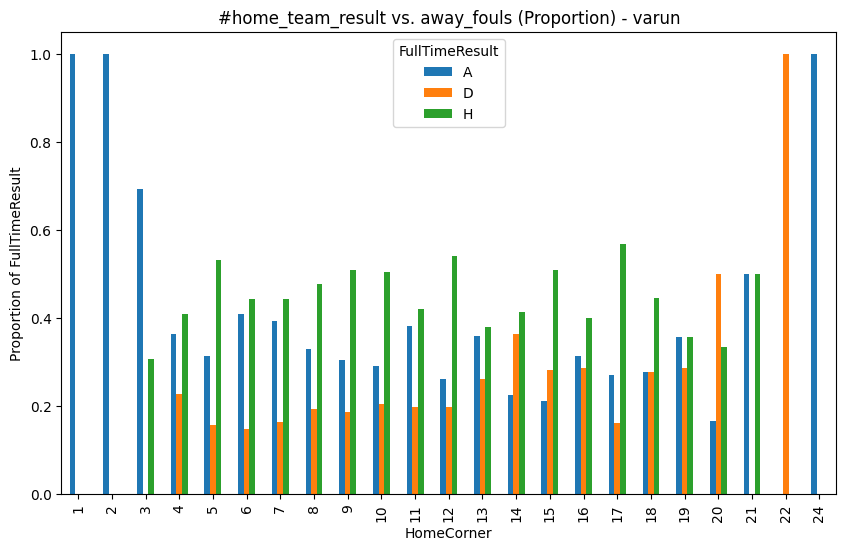

In [66]:
# Group by HomeCorner and count each FullTimeResult value
pivot = combined_df.groupby("AwayFouls")["FullTimeResult"].value_counts().unstack(fill_value=0)

# Convert counts to proportions by dividing each row by its sum
prop = pivot.div(pivot.sum(axis=1), axis=0)

# Display the resulting proportions
print(prop)

# Optional: visualize the proportions with a stacked bar chart
prop.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.title("#home_team_result vs. away_fouls (Proportion) - varun")
plt.xlabel("HomeCorner")
plt.ylabel("Proportion of FullTimeResult")
plt.legend(title="FullTimeResult")
plt.show()


FullTimeResult         A         D         H
AwayRedCards                                
0               0.329556  0.212465  0.457979
1               0.227848  0.253165  0.518987
2               0.000000  0.000000  1.000000


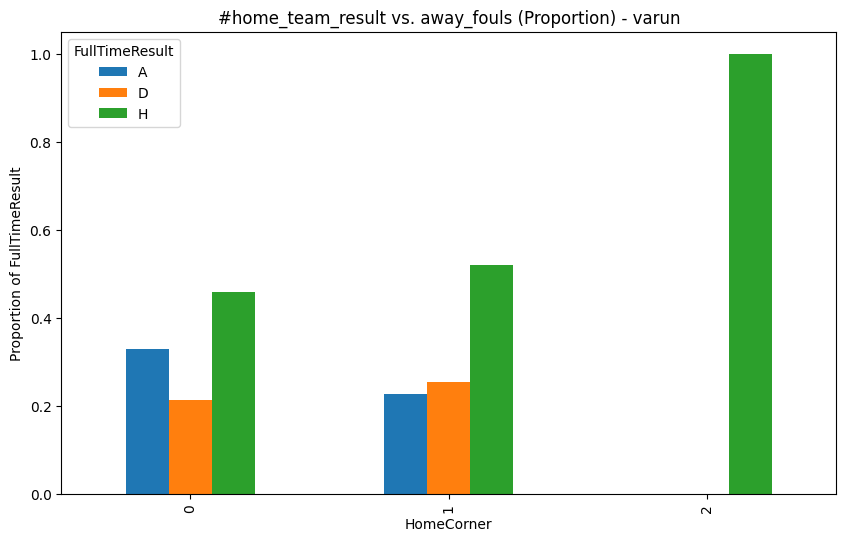

In [67]:
# Group by HomeCorner and count each FullTimeResult value
pivot = combined_df.groupby("AwayRedCards")["FullTimeResult"].value_counts().unstack(fill_value=0)

# Convert counts to proportions by dividing each row by its sum
prop = pivot.div(pivot.sum(axis=1), axis=0)

# Display the resulting proportions
print(prop)

# Optional: visualize the proportions with a stacked bar chart
prop.plot(kind="bar", stacked=False, figsize=(10, 6))
plt.title("#home_team_result vs. away_fouls (Proportion) - varun")
plt.xlabel("HomeCorner")
plt.ylabel("Proportion of FullTimeResult")
plt.legend(title="FullTimeResult")
plt.show()
